# WhatsAppNLP

The document is consisted of 3 parts:
   1. Implementation
   2. Topic Recognizer
   3. Chat Statistics



**Topic Recognizer**
- model training based on 20newsgroup dataset that is available from sklearn.
- chat preprocessing for translation to english
- preprocesing of translated words
- runing trained model with translated words to get most frequent topics of exported chat

**Chat Statistics**
- extracting statistics from passed chat log file
- categorizing and displaying usefull data from logs
- displaying available statistics in form of graphs

### Implementation

- to install WhatsAppChatAnalyzer, download or clone git repo (https://github.com/RokGrgec/WhatsAppNLP), navigate to root folder of downloaded file, and run jupyter notebook from file

- run below command to install all necessary dependencies and librarys
- follow below instructions to analyze your own WhatsApp chat

In [ ]:
!pip install -r requirements.txt

### Exporting WhatsApp chat

**DISCLAIMER - chat needs to be exported from Android mobile device, other devices are not yet supported**

![test](img/wapp_img1.jpg)
![title](img/wapp_img2.jpg)
![title](img/wapp_img3.jpg)
![title](img/wapp_img4.jpg)

- after exporting chat, place it in folder with WhatsAppNLP files

- after installing requirements.txt and exporting your WhatsApp chat, we are ready to start the analysis

# Using WhatsAppNLP as Python Library

## Topic modeling usage

- to simplify process of using WhatsAppNLP methodes, all methodes are compressed into few methodes for easy usage

- in order to analyze any WhatsApp chat log, simply run analyze_chat_topics method as shown below

In [ ]:
from data_preprocessing import *
file = 'chat.txt' 
analyize_chat_topics(file, 8) # 8 represents number of topics to recognize, 8 is recommended (more topics means less accuracy)

## Chats Statistics usage

- in order to analyze any WhatsApp chat log, simply run methods as shown below

In [22]:
from chat_statistics import *
file = 'chat_with_matea.txt'
messages_per_user(file)

name
Matea    22103
Rok      17896
Name: name, dtype: int64

In [23]:
media_per_user(file)

name
Matea    667
Rok      324
Name: name, dtype: int64

2020-08-10 00:00:00 488
2020-08-10 00:00:00 558


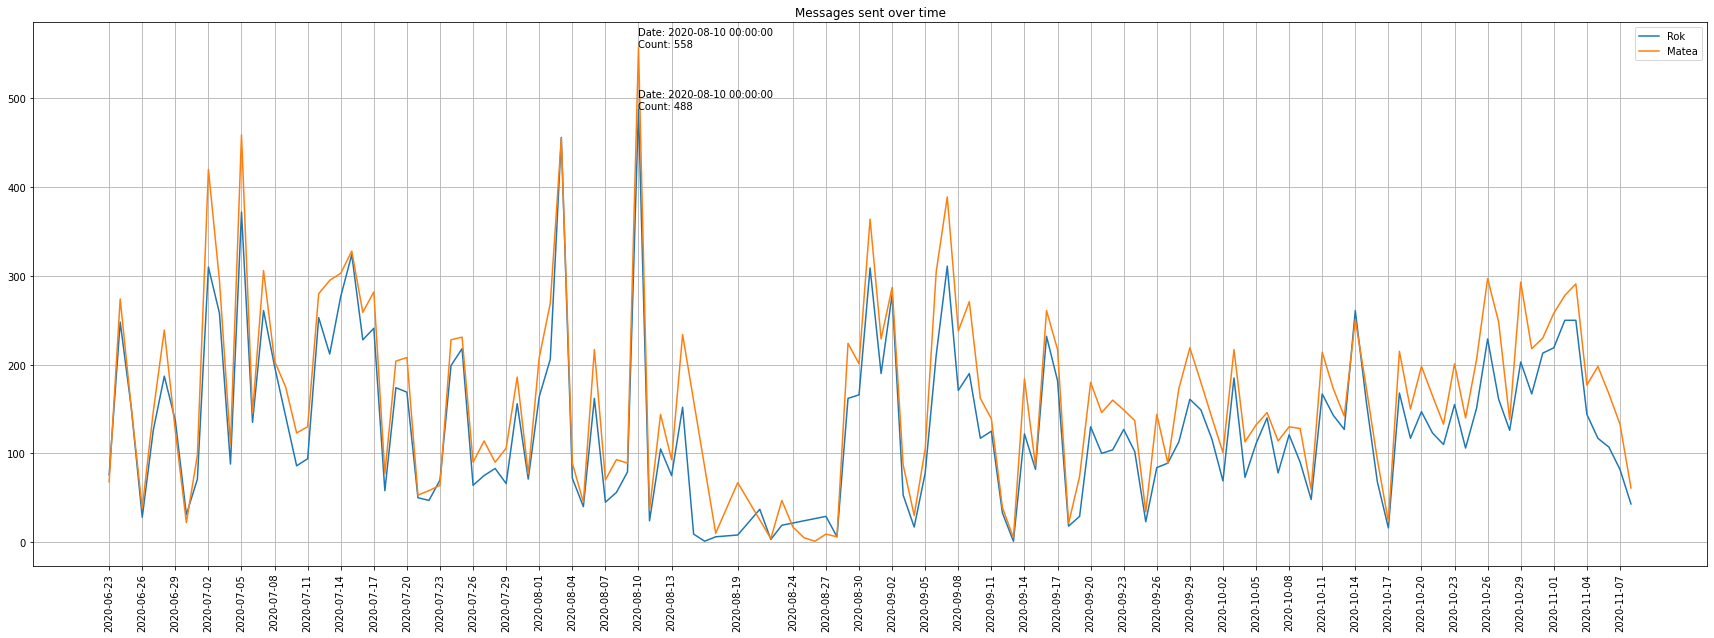

In [24]:
draw_messages_over_time_plt(file)

In [28]:
most_used_words(file) 

Top 20 croatian words written
mislim ---> 300
koliko ---> 149
mozemo ---> 137
uvijek ---> 118
toliko ---> 99
malicka ---> 95
negdje ---> 86
mislila ---> 78
poslije ---> 75
vrijeme ---> 71
jednom ---> 71
ursula ---> 69
gledam ---> 68
spavat ---> 67
yesyes ---> 64
ujutro ---> 63
sigurno ---> 62
pricat ---> 59
vidila ---> 59
stalno ---> 58
gledala ---> 55


Croatian WordCloud


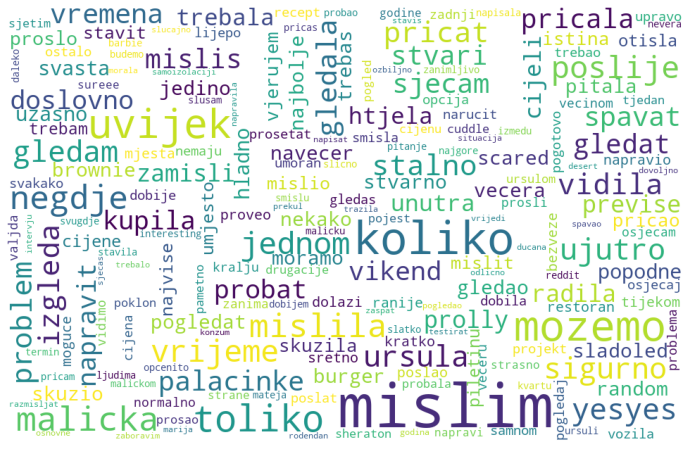

<Figure size 432x288 with 0 Axes>

In [29]:
most_used_words_wordcloud(file)

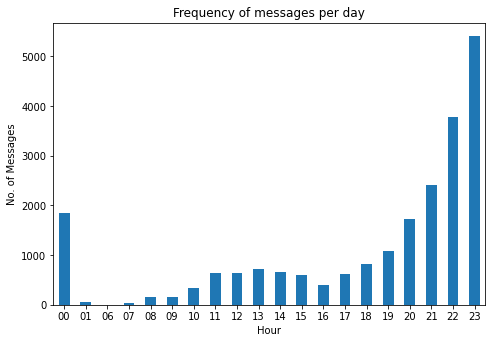

<Figure size 432x288 with 0 Axes>

In [30]:
freq_of_messages_per_day(file) 

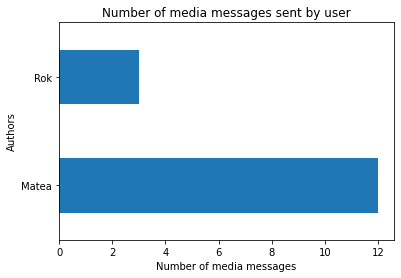

In [31]:
draw_media_per_user_plt(file)

In [32]:
calculate_word_and_letter_count(file)

Letter count: 13784, Word count: 2802


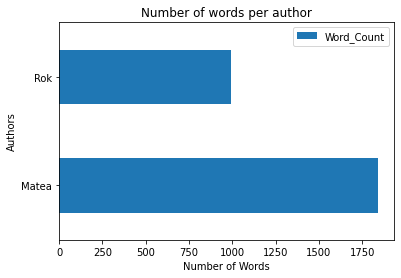

In [33]:
draw_words_per_author_plt(file)

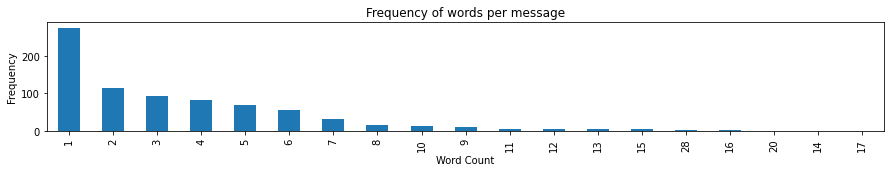

In [34]:
draw_avg_words_per_message(file)

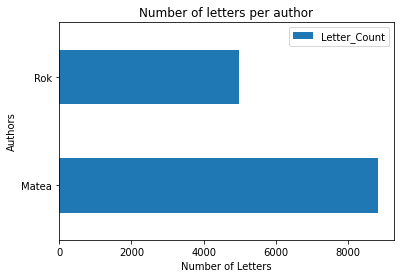

In [35]:
draw_num_of_letters_per_author(file)

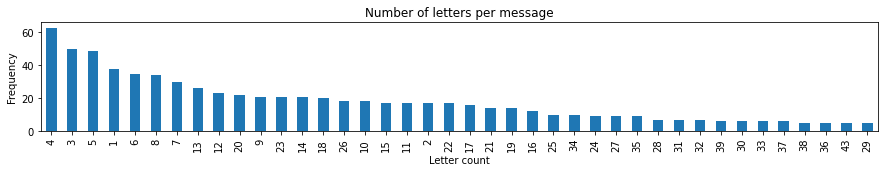

In [36]:
draw_num_of_letters_per_message(file)

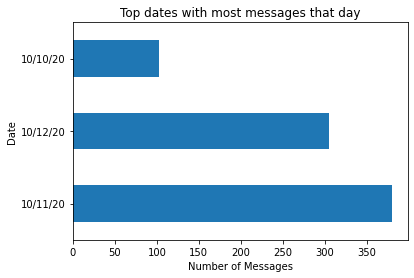

In [37]:
top_chatting_dates(file)

# Methodes Documentation

## Topic recognizer

- in following examples, we are going to describe methodes from data_preprocessing file that are used to train model, translate and preprocess words found in exported WhatsApp chat log

- the following methods **require** exported WhatsApp chat **to be in croatian** language 

## Chat log content example

In [2]:
datafile = open('chat.txt','r', encoding='utf-8')
data = datafile.readlines()
data[:5]

['6/23/20, 22:38 - Rok: Hahahah\n',
 '6/23/20, 22:38 - Rok: 🙅🏻\u200d♂️\n',
 '6/23/20, 22:39 - Matea: 😏🤭\n',
 '6/23/20, 22:39 - Matea: GLEDAJ sam si prizano\n',
 '6/23/20, 22:39 - Matea: *priznao\n']

## Preprocesing chat log file

Passing chat log file to function that:
- removes unecessary data like time and date of message & sender name
- removes emoji UNICODE
- splites arrays of strings into single array of strings
- removes numbers
- removes laugh pattern strings (eg.'hahahah')
- removes all punctuaction chars
- removes english stopwords
- removes croatian stopwords
- sets each string to lowercase
- tokenizes item - additional spliting strings into single word strings

Preprocessing strings, and storing them as list of words in this way is also called **bag of words** approach
on data preprocessing

In [4]:
# preprocesing chat log
cro_proc_words = prepare_words_for_translate(file)
print("Bag of words: ")
cro_proc_words[:5]

Bag of words


['gledaj', 'prizano', 'priznao', 'cudno', 'imma']

## Word translation

There are 3 different ways of translating words:
1. Using google translate (API) or any other "free" translator and its API
2. Writing your own translator 😏
3. My method:
    - Using google sheets and applaying **=GOOGLETRANSLATE(cell; "word_language"; "translated_language")**
    - this method bypasses google translate API restriction with maximum of 5000 words translated in period of 24 hours

In [6]:
# translating processed croatian words

# service_account stores token uri required for uusing Python automation on google sheets 
client = pygsheets.authorize(service_account_file='service_account.json')

# url to sheet
spreadsheet_url = "https://docs.google.com/spreadsheets/d/11SJ9bVleK4i8KezqnJhK7UvH0pIvb03CDpMmumbmgjs/edit#gid=468911975"
test = spreadsheet_url.split('/d/')
# parsing id required to open work sheet
id_ = test[1:][0].split('/edit')[0]

## Using Google Sheets

To upload words too google sheets, words are first writen in Output.txt file, then converted to .csv so **pd.read_csv** method can be used for creating DataFrame that is then uploaded to sheets using **set_dataframe** method

In [7]:
# reading words to file
text_file = open("Output.txt", "w", encoding='utf-8')
for item in cro_proc_words:
    text_file.write(item)
    text_file.write('\n')
text_file.close()

# converting .txt to csv for google sheets
os.rename(r"Output.txt", r"Words.csv")

# opening google sheets
sheet = client.open_by_key(id_)
wks = sheet.worksheet_by_title('Output')

# reading csv with words for translate
df = pd.read_csv('Words.csv', encoding='UTF-8')
os.remove('Words.csv')

# sending words to google sheet for tranbslate
wks.set_dataframe(df, start=(1,1))

## Translating...

Since translation of more than 50 000 words (on average) is time expensive task for google sheets
- it takes 7 minutes for 100 000 words to be translated, 100 000 is also the maximum word that is being translated, any above, will be ignored

In [1]:
############################
#    Timer needs to be     #
#        added here        #
############################

# delay of 7 minutes to translate words
#for i in range(0,420):
#    with alive_bar(i) as bar:
#        time.sleep(1)
#        bar()

## Retrieving

Translated words are being retrieved and once again preprocessed for even more precise cleaning required for more accurate topic recognition

In [8]:
# retrieving translated words 
values_list = wks.get_col(2)

# list of words ready for model processing
bag_of_words = prepare_translated_words_for_model(values_list[:len(df)]) # len(df) is used because it marks word count sent 
                                                                         # too google sheets
# first 10 translated, preprocessed words
bag_of_words[:10]

['watch',
 'recognized',
 'admit',
 'strange',
 'imma',
 'stop',
 'pack',
 'waiting',
 'instant',
 'good']

# Model training

## 20newsgroup dataset 
- is one of the most common datasets used in Natural Language Processing (NLP) for training a mdoel.
- it consists of nearly 18,000 emails each of which relates to one of 20 topics, used for later topic reckognition based on chat log input.

In [5]:
# MODEL TRAINING
from data_preprocessing import preprocess

newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

processed_docs = []

# preprocess method:
# splites arrays of strings into single array of strings
# removes numbers
# removes laugh pattern strings (eg.'hahahah')
# removes all punctuaction chars
# removes english stopwords
# sets each string to lowercase
# tokenizes item - additional spliting strings into single word strings
# leminizes words (eg. looking - look, killed - kill)

for doc in newsgroups_train.data:
    processed_docs.append(preprocess(doc))

## Bag of words on 20newsgroup

In [6]:
# Preview 'processed_docs'

print(processed_docs[:2])

[['lerxst', 'thing', 'subject', 'nntp', 'post', 'host', 'organ', 'univers', 'maryland', 'colleg', 'park', 'line', 'wonder', 'enlighten', 'door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'histori', 'info', 'funki', 'look', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst'], ['guykuo', 'carson', 'washington', 'subject', 'clock', 'poll', 'final', 'summari', 'final', 'clock', 'report', 'keyword', 'acceler', 'clock', 'upgrad', 'articl', 'shelley', 'qvfo', 'innc', 'organ', 'univers', 'washington', 'line', 'nntp', 'post', 'host', 'carson', 'washington', 'fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'rat', 'speed', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'day',

Creating a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'

In [7]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 addit
1 bodi
2 bricklin
3 bring
4 bumper
5 call
6 colleg
7 door
8 earli
9 engin
10 enlighten


## Filtering extremes

filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

Filter out words that appear in
- less than no_below documents (absolute number) or
- more than no_above documents (fraction of total corpus size, not absolute number).
- after (1) and (2), keep only the first keep_n most frequent tokens (or keep all if None).

In [8]:
# removing words appearing less than 15 times
# removing words appearing in more than 10% of all documents
# keeping first 100,000
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

## Gensim doc2bow

**doc2bow(document)**

- Converts document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples. Each word is assumed to be a tokenized and normalized string (either unicode or utf8-encoded).


- Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
    words and how many times those words appear. Save this to '**bow_corpus**'


In [9]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

## Preview of processed document from corpus (with doc num 20)

- preview shows how many times each unique (preprocessed) word occurres 

In [10]:
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 18 ("rest") appears 1 time.
Word 166 ("clear") appears 1 time.
Word 336 ("refer") appears 1 time.
Word 350 ("true") appears 1 time.
Word 391 ("technolog") appears 1 time.
Word 437 ("christian") appears 1 time.
Word 453 ("exampl") appears 1 time.
Word 476 ("jew") appears 1 time.
Word 480 ("lead") appears 1 time.
Word 482 ("littl") appears 3 time.
Word 520 ("wors") appears 2 time.
Word 721 ("keith") appears 3 time.
Word 732 ("punish") appears 1 time.
Word 803 ("california") appears 1 time.
Word 859 ("institut") appears 1 time.
Word 917 ("similar") appears 1 time.
Word 990 ("allan") appears 1 time.
Word 991 ("anti") appears 1 time.
Word 992 ("arriv") appears 1 time.
Word 993 ("austria") appears 1 time.
Word 994 ("caltech") appears 2 time.
Word 995 ("distinguish") appears 1 time.
Word 996 ("german") appears 1 time.
Word 997 ("germani") appears 3 time.
Word 998 ("hitler") appears 1 time.
Word 999 ("livesey") appears 2 time.
Word 1000 ("motto") appears 2 time.
Word 1001 ("order") appear



## Latent Dirichlet Allocation

LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

- Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words.
- LDA assumes that the every chunk of text we feed into it will contain words that are somehow related. Therefore choosing the right corpus of data is crucial.
- It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution.


## Running LDA using Bag of Words

We are going for 20 topics in the document corpus, for wider topic categorization.

Some of the parameters we will be tweaking are:

- num_topics is the number of requested topics to be extracted from the training corpus.
- id2word is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.
- workers is the number of extra processes to use for parallelization. Uses all available cores by default.
- alpha and eta are hyperparameters that affect sparsity of the document-topic (theta) and topic-word (lambda) distributions. We will let these be the default values for now(default value is 1/num_topics)

    - Alpha is the per document topic distribution.
        - High alpha: Every document has a mixture of all topics(documents appear similar to each other).
        - Low alpha: Every document has a mixture of very few topics
    - Eta is the per topic word distribution.
        - High eta: Each topic has a mixture of most words(topics appear similar to each other).
        - Low eta: Each topic has a mixture of few words.
- passes is the number of training passes through the corpus. For example, if the training corpus has 50,000 documents, chunksize is 10,000 and passes is 2, then training is done in 10 updates:

- Updates:
    - #1 documents 0-9,999
    - #2 documents 10,000-19,999
    - #3 documents 20,000-29,999
    - #4 documents 30,000-39,999
    - #5 documents 40,000-49,999
    - #6 documents 0-9,999
    - #7 documents 10,000-19,999
    - #8 documents 20,000-29,999
    - #9 documents 30,000-39,999
    - #10 documents 40,000-49,999

In [14]:
# Training  lda model using gensim.models.LdaMulticore and save it to 'lda_model'

lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

## Showcase of model

Now that model is trained, we can display all topcis that are categorised and their coresponding words that describe each topic

- each word in topic has value next to it that describes the weight of that word for that particular topic
- this also proves that our model works sice it was passed around 18,000 random documents

In [15]:
# displaying topics recognised by model
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.018*"window" + 0.017*"file" + 0.011*"program" + 0.007*"imag" + 0.007*"version" + 0.006*"graphic" + 0.006*"avail" + 0.006*"softwar" + 0.006*"color" + 0.005*"server"


Topic: 1 
Words: 0.018*"space" + 0.016*"nasa" + 0.013*"drive" + 0.011*"scsi" + 0.009*"armenian" + 0.007*"orbit" + 0.005*"launch" + 0.005*"turkish" + 0.005*"access" + 0.005*"control"


Topic: 2 
Words: 0.013*"christian" + 0.008*"jesus" + 0.007*"exist" + 0.005*"bibl" + 0.005*"moral" + 0.005*"word" + 0.005*"religion" + 0.005*"church" + 0.004*"life" + 0.004*"atheist"


Topic: 3 
Words: 0.007*"israel" + 0.006*"kill" + 0.006*"isra" + 0.004*"jew" + 0.004*"govern" + 0.004*"live" + 0.004*"arab" + 0.004*"happen" + 0.003*"human" + 0.003*"leav"


Topic: 4 
Words: 0.018*"game" + 0.015*"team" + 0.011*"play" + 0.010*"player" + 0.007*"hockey" + 0.006*"season" + 0.005*"leagu" + 0.005*"score" + 0.004*"basebal" + 0.004*"toronto"


Topic: 5 
Words: 0.007*"bike" + 0.004*"car" + 0.004*"drive" + 0.004*"engin" + 0.004*"insur" +

## Testing trained model

Testing text: 

"One of the key points of Jesus’ ministry was how the Kingdom of God is accessible to all people. This underlying theme is especially apparent in parables like “The Good Samaritan”, “A Lost Sheep”, and “A Lost Son”. These parables are used to explain how Samaritans, the lost, and sinners all can find their way back to God, and how they will be greeted and embraced by a loving Jesus. These stories illustrate one of Jesus’ main teachings, that all people who have faith in Him, will be accepted and embraced by God in heaven."

- the model should recognize topic as something related to "religion"

In [16]:
testing_topic = 
  'One of the key points of Jesus’ ministry was how the Kingdom of God is accessible to all people.'
+ 'This underlying theme is especially apparent in parables like “The Good Samaritan”, “A Lost Sheep”, and “A Lost Son”.' 
+ 'These parables are used to explain how Samaritans, the lost, and sinners all can find their way back to God, and how they 
+ 'will be greeted and embraced by a loving Jesus. These stories illustrate one of Jesus’ main teachings, that all people who'
+ 'have faith in Him, will be accepted and embraced by God in heaven.'

# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(testing_topic))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))


Score: 0.9686757922172546	 Topic: 0.013*"christian" + 0.008*"jesus" + 0.007*"exist" + 0.005*"bibl" + 0.005*"moral"


## The Good Stuff

Final step in topic recognition is to pass bag of words created from WhatsApp chat log, through created model.

Bag of words is first vectorised (each words is transformed into its corresponding numeric value)

Each topic recognised has its corresponding **score** that calculates with what accuraccy is that topic categorised and its corresponding **words with word weights**

In [21]:
# vectorising bag of words from chat log
bow_vector = dictionary.doc2bow(bag_of_words)

# printing score, topic and associated words
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.4992588758468628	 Topic: 0.016*"drive" + 0.006*"sale" + 0.005*"bike" + 0.005*"price" + 0.005*"power"
Score: 0.18677155673503876	 Topic: 0.006*"israel" + 0.005*"kill" + 0.005*"isra" + 0.005*"govern" + 0.004*"live"
Score: 0.11866847425699234	 Topic: 0.011*"christian" + 0.007*"jesus" + 0.006*"exist" + 0.005*"moral" + 0.005*"bibl"
Score: 0.1022740975022316	 Topic: 0.018*"game" + 0.015*"team" + 0.011*"play" + 0.010*"player" + 0.007*"hockey"
Score: 0.04742299020290375	 Topic: 0.015*"window" + 0.014*"file" + 0.009*"program" + 0.007*"card" + 0.006*"softwar"
Score: 0.04000191017985344	 Topic: 0.017*"space" + 0.014*"nasa" + 0.006*"orbit" + 0.006*"presid" + 0.005*"launch"


# Chat Statistics

In next section, chat log is processed in a way to calculate available information about chating in a period from first message to the last message in WhatsApp chat log file

In [22]:
from chat_statistics import *
# link to file
file = 'chat.txt' 
chat = read_file(file)

In [23]:
data = list()

for line in chat:
    data.append(split_line(line))
data = [entry for entry in data if entry]

## Using DataFrame

DataFrame is used to display data in its original form

In [24]:
df = pd.DataFrame(data)
df = df.sort_values(by="date")
df

,date,time,name,message
0,2020-06-23,22:38,Rok,Hahahah
92,2020-06-23,23:54,Rok,To je siva zona
93,2020-06-23,23:54,Matea,Onak vidim neke da idu u faking italiju. Like ...
94,2020-06-23,23:54,Matea,Ok sad su bih i srb opasiji
95,2020-06-23,23:54,Matea,Oni imaju po 100 novih dnevno
...,...,...,...,...
39923,2020-11-08,00:06,Rok,tri su
39922,2020-11-08,00:06,Rok,ahh
39921,2020-11-08,00:05,Matea,Where
39945,2020-11-08,00:15,Matea,Haha


## Sorting df
- sorting df by Username of chat participant

In [25]:
senders = df.name.unique()

## Number of messages per user

In [26]:
# messages sent per sender
df.groupby(by="name")["name"].count()

name
Matea    22103
Rok      17896
Name: name, dtype: int64

## Number of media files sent per user

- media files includes all videos, gifs, images, and audio files

In [27]:
# media per sender
df[df['message'].str.contains("<Media omitted>")].groupby(by="name")["name"].count()

name
Matea    667
Rok      324
Name: name, dtype: int64

## Grouping messages

-  grouping based on message count over time period for data visualization

In [28]:
# messages over time
messages_count_over_time = df.groupby(by=["date", "name"]).name.agg("count").to_frame("count_").reset_index().sort_values(by="date")

## Using matplotlib lib

- Using matplotlib lib to display messages over time 

2020-08-10 00:00:00 488
2020-08-10 00:00:00 558


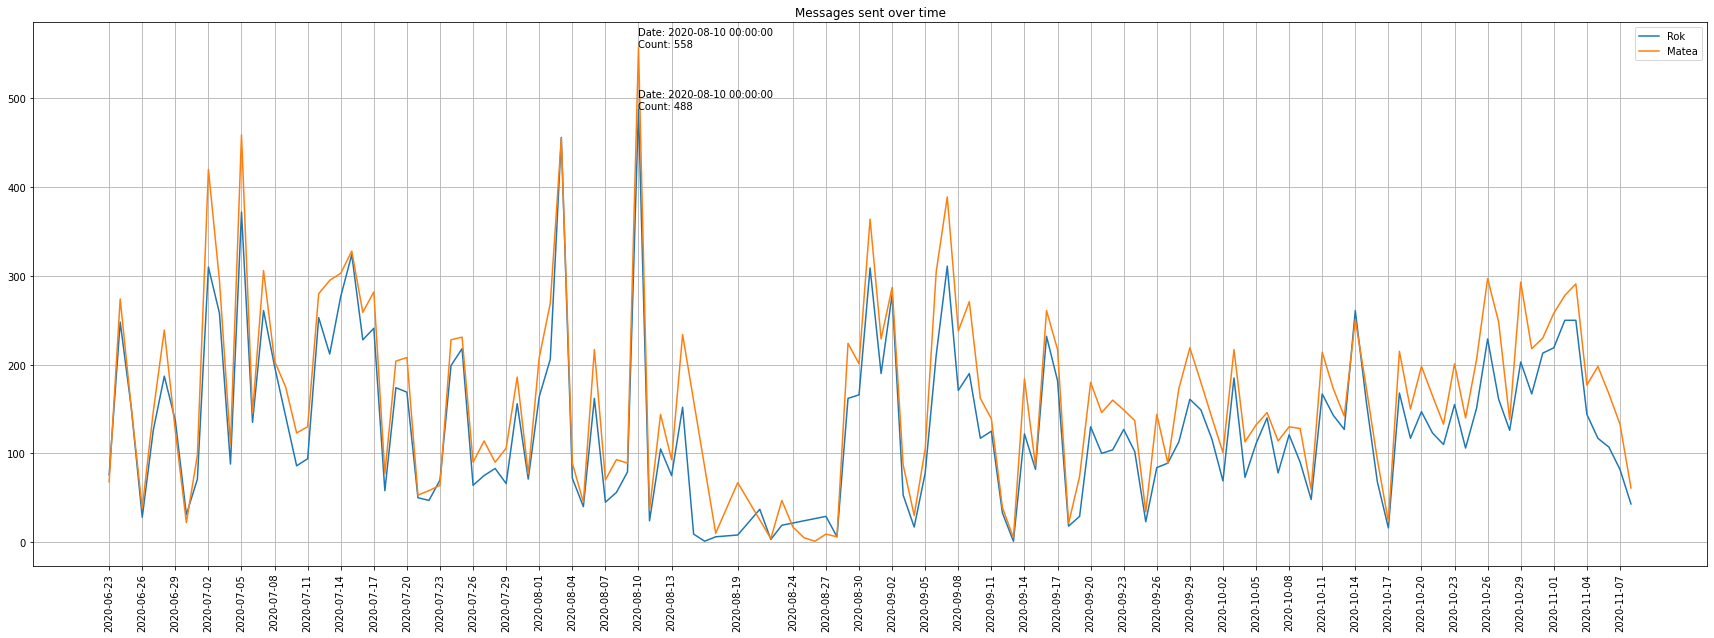

In [29]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(60,10))
freq = 3
fig, ax = plt.subplots(figsize=(30,10))
for sender in senders:
    tmp_df = messages_count_over_time[messages_count_over_time['name'] == sender]
    
    # Spot max count_ date
    max_data = tmp_df.loc[tmp_df['count_'].idxmax()]
    print(max_data.date, max_data.count_)
    ax.annotate('Date: {}\nCount: {}'.format(max_data.date, max_data.count_), xy=(max_data.date, max_data.count_))
    
    ax.plot(tmp_df.date, tmp_df.count_, label = sender)
    plt.xticks(rotation=90)
    ax.legend()
    ax.grid(True)
    plt.title("Messages sent over time")
    plt.xticks(tmp_df.date[::freq])

#plt.savefig("over_time.png")

## Emoji count 

- counting number of emojis used per user and displaying top 10 emojis for user 

In [30]:
emojis_per_sender = {}
for sender in senders:
    emojis_count = defaultdict(int)
    messages = df[df['name'] == sender][['name','message']]
    emojis = extract_emojis("message", messages)
    
    for e in emojis:
        emojis_count[e] += 1    
    
    emojis_per_sender[sender] = emojis_count

In [31]:
N = 10

for sender, emojis in emojis_per_sender.items():
    print("Top {} emojis sent by {}".format(N, sender))
    sorted_dict = {k: v for k, v in sorted(emojis.items(), key=lambda item: item[1], reverse=True)}
    pretty_print(sorted_dict,N)

Top 10 emojis sent by Rok
🏻 ---> 792
♂ ---> 776
🤷 ---> 667
😎 ---> 592
😮 ---> 473
😘 ---> 467
😢 ---> 366
😡 ---> 207
🥴 ---> 201
🙅 ---> 109
😍 ---> 69
Top 10 emojis sent by Matea
🏼 ---> 936
♀ ---> 887
🥺 ---> 619
🥴 ---> 602
😘 ---> 591
😝 ---> 578
🤭 ---> 542
🤷 ---> 512
😮 ---> 479
😎 ---> 400
🙅 ---> 313


In [32]:
## From deleted messages section and media sent section, we notice that we need to remove those expressions before building a corpus
df = df[(df['message'] != "<Media omitted>") & (~df['message'].str.contains("deleted"))]

## Most used words

- Calculating most used words and their occurrance in croatian and english

In [34]:
prep_cro_words = prepare_words_for_translate(file)
cro_words = list()
for word in prep_cro_words:
    if len(word) > 5:
        cro_words.append(word)

prep_eng_words = prepare_translated_words_for_model(values_list[:len(df)])

eng_words = list()
for word in prep_eng_words:
    if len(word) > 5:
        eng_words.append(word)


# croatian words
N = 20 # top 20 words
word_frequencies = word_freq(cro_words)
print("Top {} croatian words written".format(N))
pretty_print(word_frequencies,N)

# english words
word_frequencies = word_freq(eng_words)
print("Top {} english words written".format(N))
pretty_print(word_frequencies,N)

Top 20 croatian words written
mislim ---> 300
koliko ---> 149
mozemo ---> 137
uvijek ---> 118
toliko ---> 99
malicka ---> 95
negdje ---> 86
mislila ---> 78
poslije ---> 75
vrijeme ---> 71
jednom ---> 71
ursula ---> 69
gledam ---> 68
spavat ---> 67
yesyes ---> 64
ujutro ---> 63
sigurno ---> 62
pricat ---> 59
vidila ---> 59
stalno ---> 58
gledala ---> 55
Top 20 english words written
resins ---> 120
tomorrow ---> 106
remember ---> 78
testify ---> 74
couple ---> 71
people ---> 66
ursula ---> 58
waiting ---> 53
character ---> 53
morning ---> 50
strange ---> 46
pancakes ---> 46
picture ---> 44
constantly ---> 40
malicka ---> 38
matthew ---> 36
watching ---> 35
father ---> 34
imagine ---> 33
outdoors ---> 32
interest ---> 32


## WordCloud

- generating word clouds for croatian and english words

Croatian WordCloud


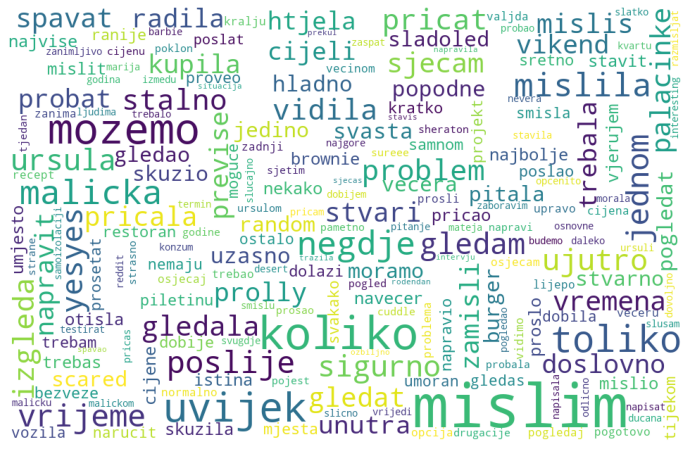

English WordCloud


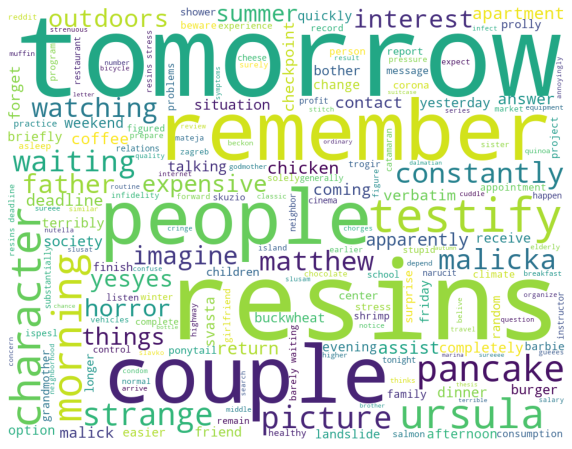

In [36]:
### Wordcloud per sender

print('Croatian WordCloud')
mask = 'WordCloud\word_cloud1.png'
generate_wordcloud(cro_words, True, mask)
      
      
print('English WordCloud')
mask = 'WordCloud\word_cloud2.png'
generate_wordcloud(eng_words, True, mask)

# Chat Statistics Shown Using Graphs

## Frequency of messages per day

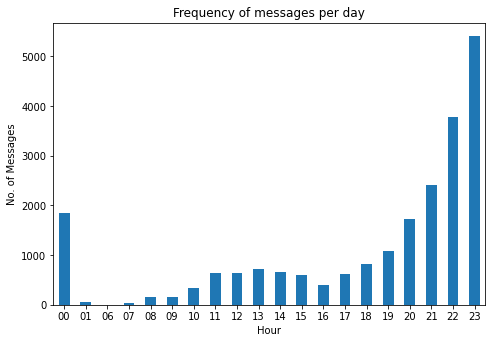

In [37]:
file = open(r'chat.txt',mode='r',encoding="utf8")
data = file.read()
file.close()


hour_pattern = '(\d+):\d+\s+-\s+\w+\s?\w+?\s?\w+\s?\w+:\s'
hours = re.findall(hour_pattern,data)
time = pd.DataFrame({'hours':hours})
busy_hours = time['hours'].value_counts()
busy_hours.sort_index(inplace=True)
plt.axes([1,1,1,0.98])
plt.grid(True)
busy_hours.plot.bar()
plt.title("Frequency of messages per day")
plt.xlabel('Hour')
plt.ylabel('No. of Messages')
plt.xticks(rotation=0)
plt.show()

## Recreation of DataFrames

- recreation of DataFrames for different approach and gathering of different data

In [38]:
parsedData = []
conversationPath = 'chat.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() 
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() 
        if startsWithDateTime(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer

df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.head()

,Date,Time,Author,Message
0,None,None,None,"6/23/20, 22:38 - Rok: 🙅🏻‍♂️ 6/23/20, 22:39 - M..."
1,10/10/20,00:03,Matea,Gledam emily in paris🥴
2,10/10/20,00:03,Matea,Bas sam basic white bish
3,10/10/20,00:12,Rok,Nemam pojma tko je to
4,10/10/20,00:17,Matea,Idk serija neka


In [39]:
# removing null data from dataframe
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message
0,None,None,None,"6/23/20, 22:38 - Rok: 🙅🏻‍♂️ 6/23/20, 22:39 - M..."


## Displaying data

## Number of media messages sent by user

         Date   Time Author          Message
13   10/10/20  20:13  Matea  <Media omitted>
17   10/10/20  20:34  Matea  <Media omitted>
21   10/10/20  20:43    Rok  <Media omitted>
89   10/10/20  22:31  Matea  <Media omitted>
188  10/11/20  15:32  Matea  <Media omitted>


Text(0, 0.5, 'Authors')

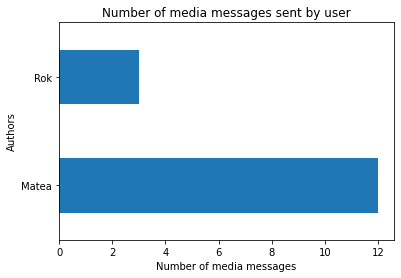

In [41]:
media_messages_df = df[df['Message'] == '<Media omitted>']
print(media_messages_df.head())

author_media_messages_value_counts = media_messages_df['Author'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
top_10_author_media_messages_value_counts.plot.barh()
plt.title("Number of media messages sent by user")
plt.xlabel('Number of media messages')
plt.ylabel('Authors')

In [42]:
# Drops all rows of the data frame containing messages from null authors
messages_df = df.drop(null_authors_df.index)

# Drops all rows of the data frame containing media messages
messages_df = messages_df.drop(media_messages_df.index)
messages_df.head()

,Date,Time,Author,Message
1,10/10/20,00:03,Matea,Gledam emily in paris🥴
2,10/10/20,00:03,Matea,Bas sam basic white bish
3,10/10/20,00:12,Rok,Nemam pojma tko je to
4,10/10/20,00:17,Matea,Idk serija neka
5,10/10/20,00:19,Rok,Random serija?


## Generating letter count and word count collumns in dataset

In [43]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df.head()

,Date,Time,Author,Message,Letter_Count,Word_Count
1,10/10/20,00:03,Matea,Gledam emily in paris🥴,22,4
2,10/10/20,00:03,Matea,Bas sam basic white bish,24,5
3,10/10/20,00:12,Rok,Nemam pojma tko je to,21,5
4,10/10/20,00:17,Matea,Idk serija neka,15,3
5,10/10/20,00:19,Rok,Random serija?,14,2


In [44]:
messages_df['Letter_Count'].sum(), messages_df['Word_Count'].sum()

(13784, 2802)

## Words per author

Text(0, 0.5, 'Authors')

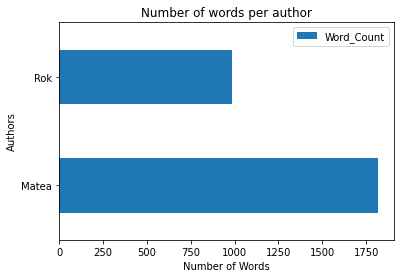

In [45]:
total_word_count_grouped_by_author = messages_df[['Author', 'Word_Count']].groupby('Author').sum()
sorted_total_word_count_grouped_by_author = total_word_count_grouped_by_author.sort_values('Word_Count', ascending=False)
top_10_sorted_total_word_count_grouped_by_author = sorted_total_word_count_grouped_by_author.head(10)
top_10_sorted_total_word_count_grouped_by_author.plot.barh()
plt.title("Number of words per author")
plt.xlabel('Number of Words')
plt.ylabel('Authors')

## Frequency of words per message

Text(0, 0.5, 'Frequency')

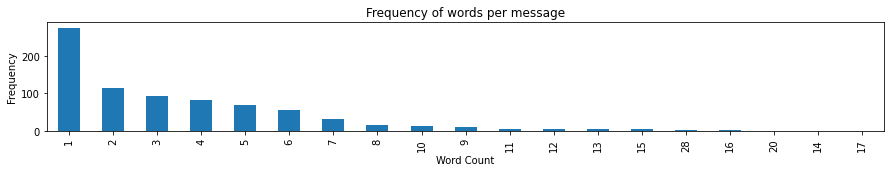

In [46]:
plt.figure(figsize=(15, 2)) # To ensure that the bar plot fits in the output cell of a Jupyter notebook
word_count_value_counts = messages_df['Word_Count'].value_counts()
top_40_word_count_value_counts = word_count_value_counts.head(40)
top_40_word_count_value_counts.plot.bar()
plt.title("Frequency of words per message")
plt.xlabel('Word Count')
plt.ylabel('Frequency')

## Number of letters per author

Text(0, 0.5, 'Authors')

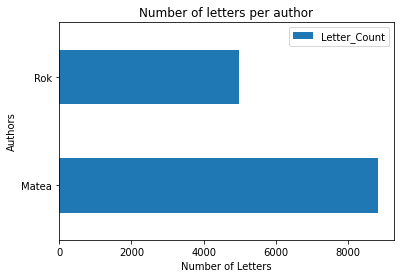

In [47]:
total_letter_count_grouped_by_author = messages_df[['Author', 'Letter_Count']].groupby('Author').sum()
sorted_total_letter_count_grouped_by_author = total_letter_count_grouped_by_author.sort_values('Letter_Count', ascending=False)
top_10_sorted_total_letter_count_grouped_by_author = sorted_total_letter_count_grouped_by_author.head(10)
top_10_sorted_total_letter_count_grouped_by_author.plot.barh()
plt.title("Number of letters per author")
plt.xlabel('Number of Letters')
plt.ylabel('Authors')

## Number of letters per message

Text(0, 0.5, 'Frequency')

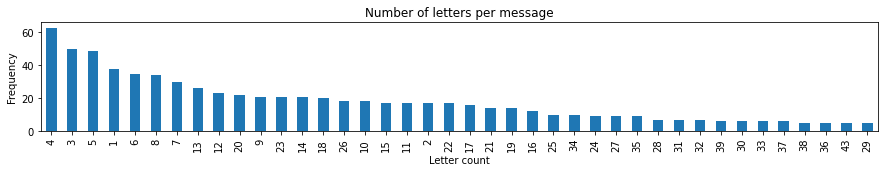

In [48]:
plt.figure(figsize=(15, 2))
letter_count_value_counts = messages_df['Letter_Count'].value_counts()
top_40_letter_count_value_counts = letter_count_value_counts.head(40)
top_40_letter_count_value_counts.plot.bar()
plt.title("Number of letters per message")
plt.xlabel('Letter count')
plt.ylabel('Frequency')

## Top dates with most words per day

Text(0, 0.5, 'Date')

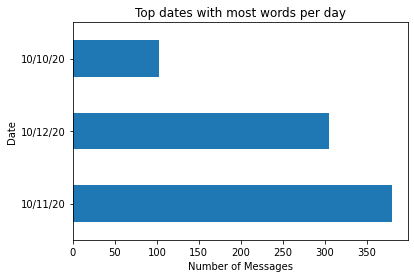

In [49]:
messages_df['Date'].value_counts().head(10).plot.barh()
plt.title("Top dates with most words per day")
plt.xlabel('Number of Messages')
plt.ylabel('Date')